In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data

df = pd.read_csv("/home/inventor/Datasets/Ames housing dataset/ames_housing/AmesHousing.csv")

In [48]:
# Check the Shape

df.shape

(2930, 82)

In [49]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [50]:
# Info the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

#### Remove that Features which have Less Samples 

- Alley -> Object
- Pool QC
- Fence
- Misc Feature


In [6]:
df.drop(columns=["Alley", "Pool QC", "Fence", "Misc Feature"], axis=1, inplace=True)

In [7]:
df.shape

(2930, 78)

In [8]:
import missingno as masno

<Axes: >

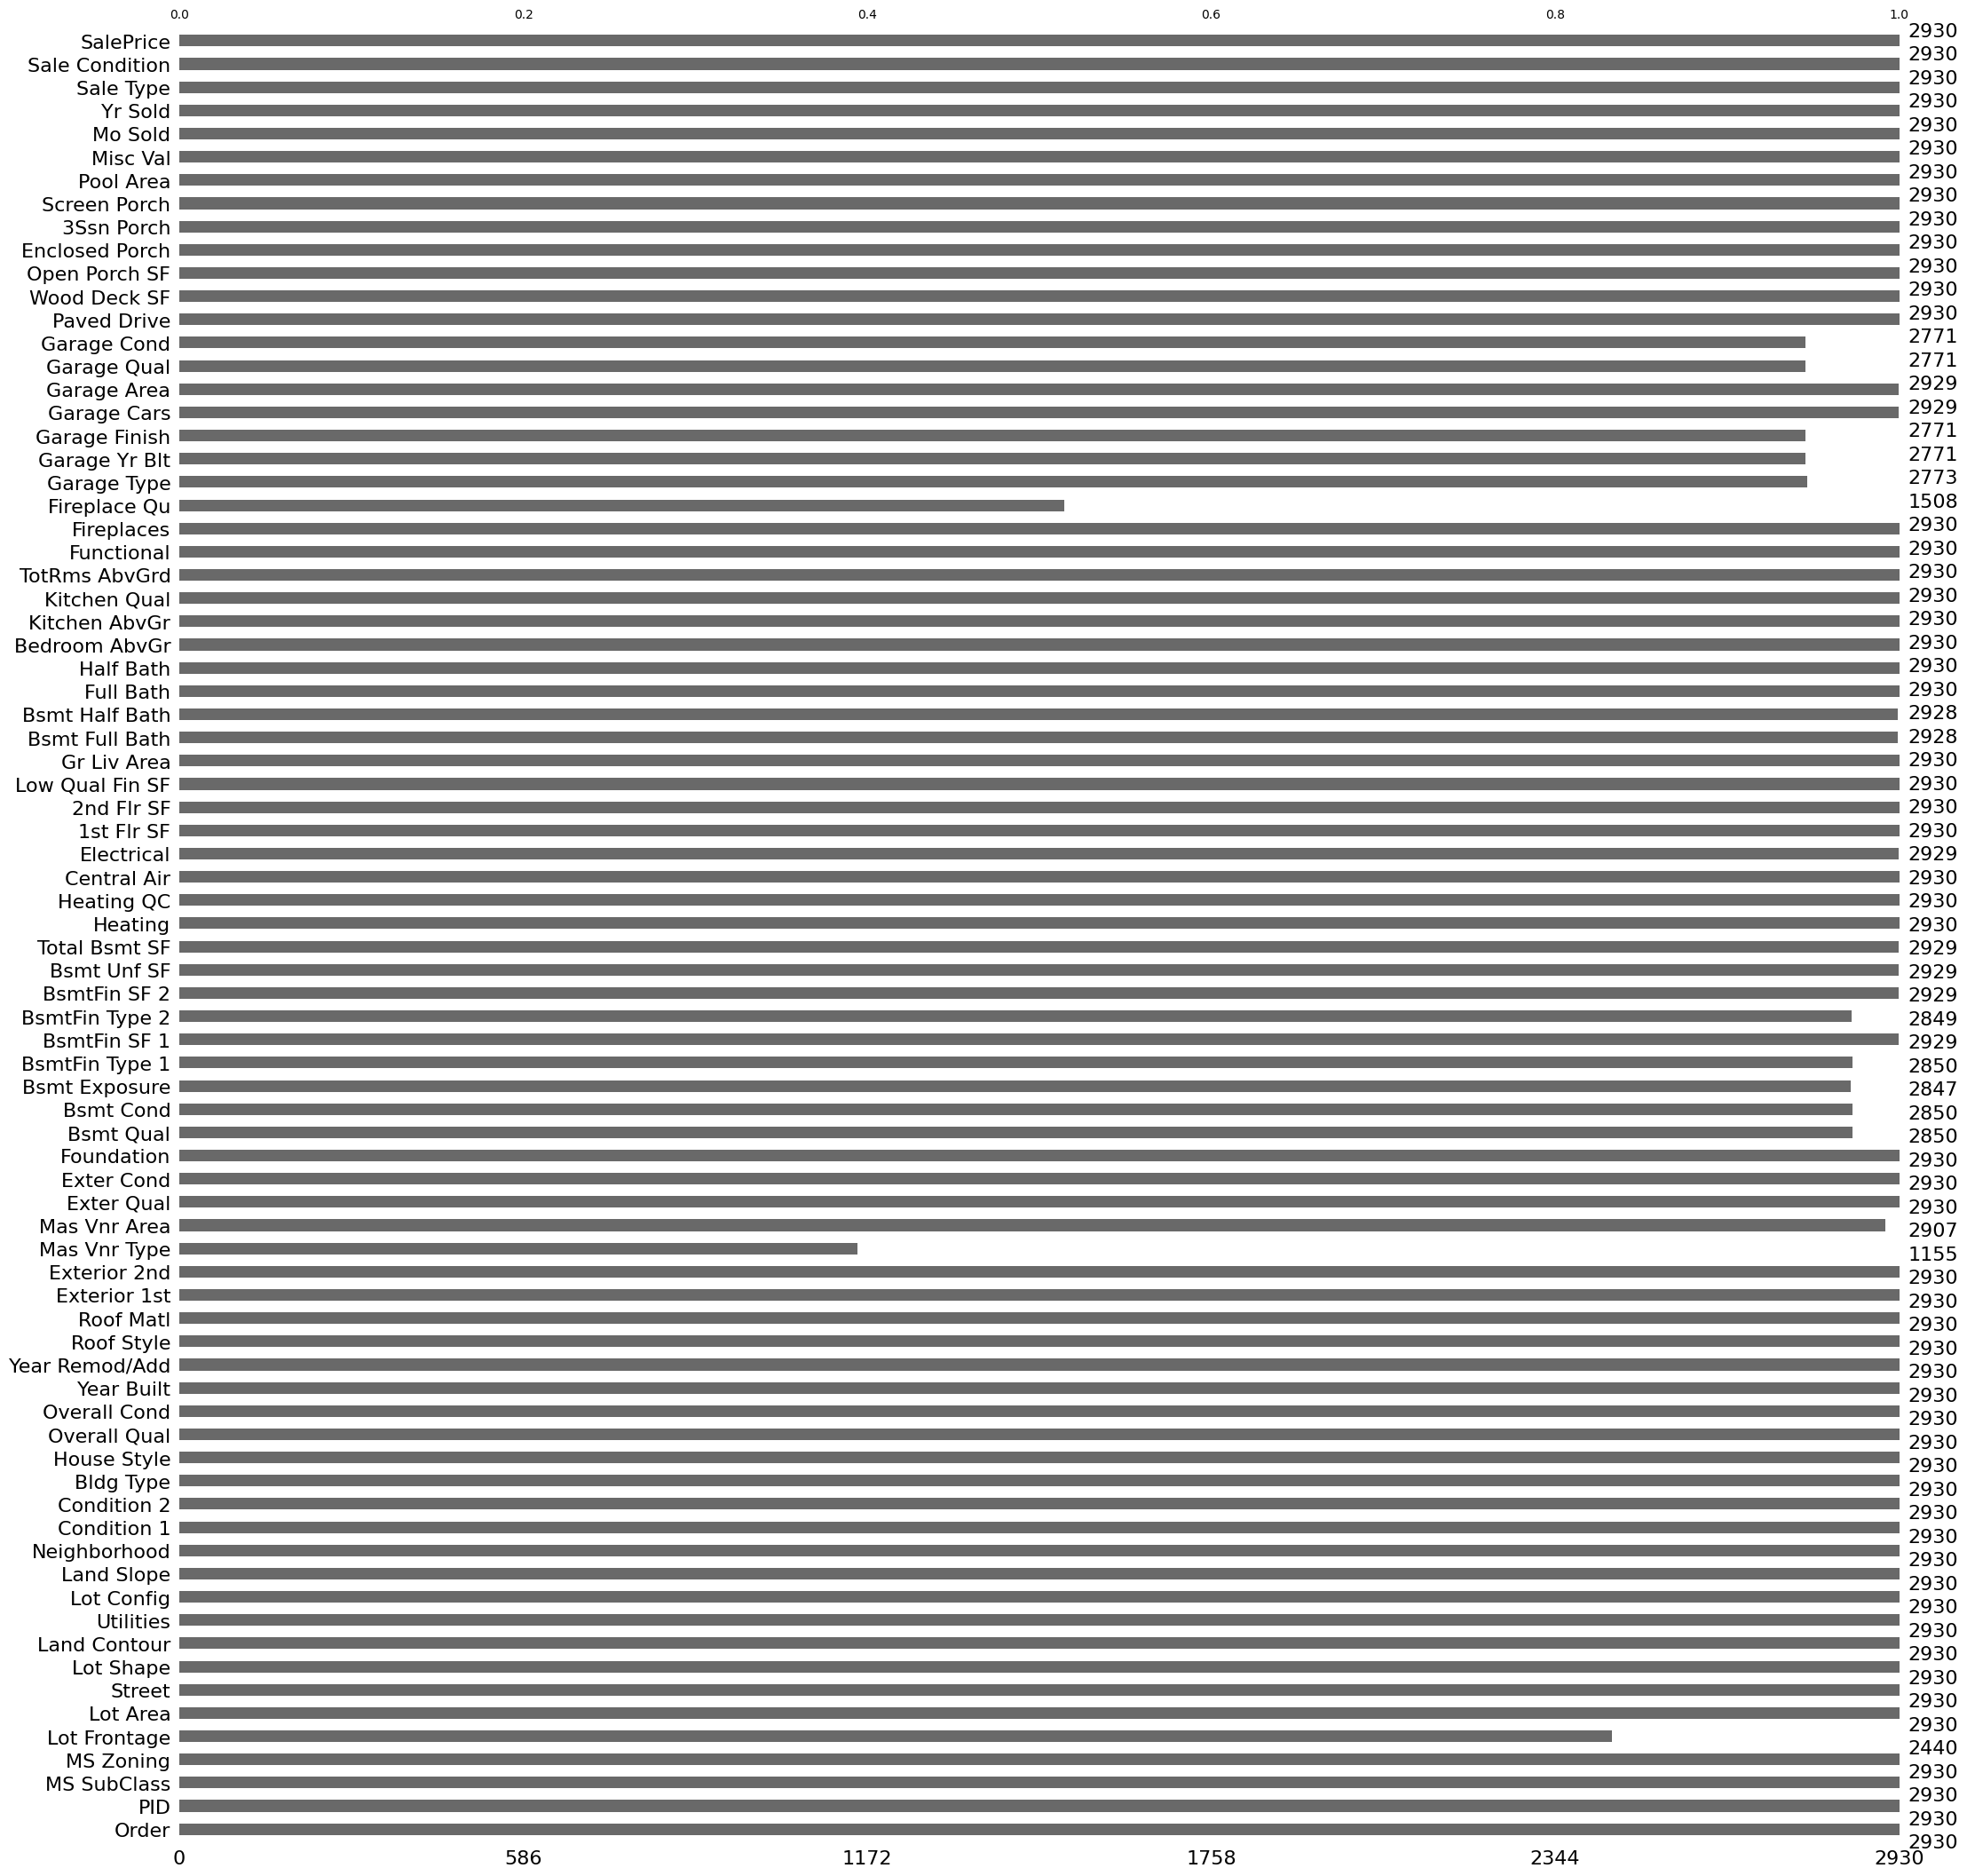

In [9]:
masno.bar(df)

<Axes: >

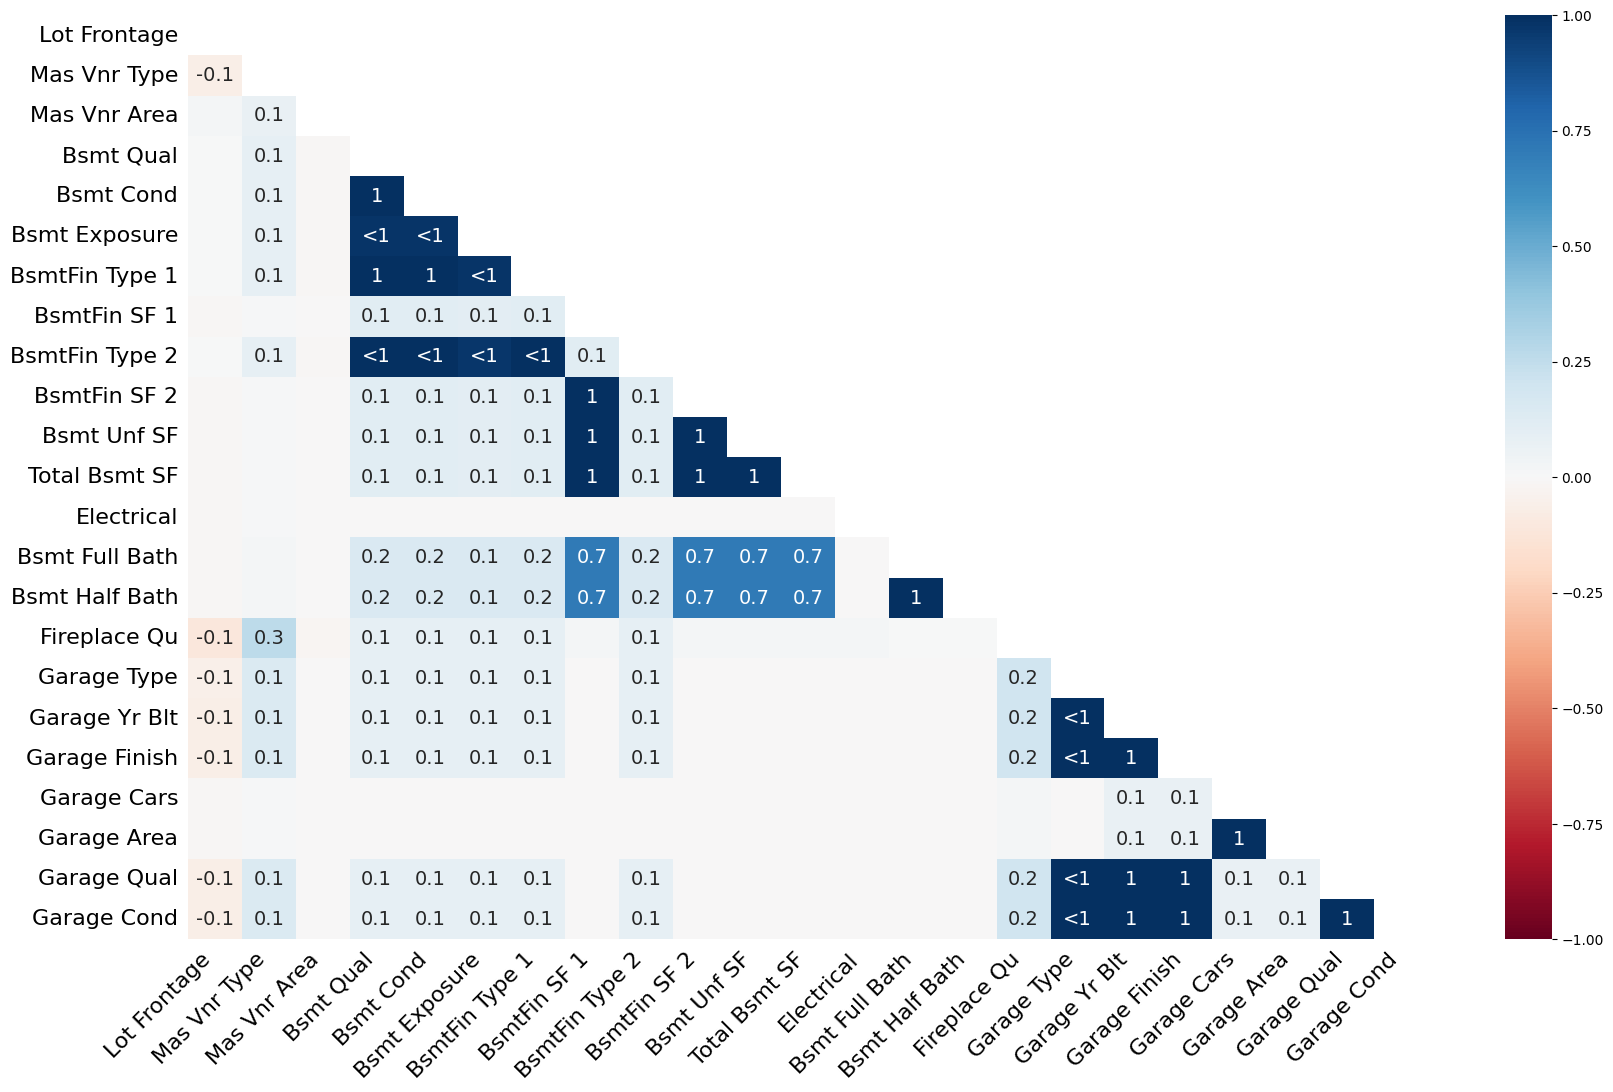

In [10]:
masno.heatmap(df)

In [17]:
# Handle the Missing Values

# First Categorize the data into Num Cols and Cat Cols

num_cols = [feature for feature in df.columns if df[feature].dtypes in ["int64", "float64"]]
cat_cols = [feature for feature in df.columns if df[feature].dtypes not in ["int64", "float64"]]

In [20]:
# Handle the missing values

from sklearn.impute import SimpleImputer

imputer_num = SimpleImputer(strategy="mean")

df[num_cols] = imputer_num.fit_transform(df[num_cols])

In [21]:
df[num_cols]

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1.0,526301100.0,20.0,141.0,31770.0,6.0,5.0,1960.0,1960.0,112.0,...,210.0,62.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,215000.0
1,2.0,526350040.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,...,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,105000.0
2,3.0,526351010.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,...,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,172000.0
3,4.0,526353030.0,20.0,93.0,11160.0,7.0,5.0,1968.0,1968.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0,244000.0
4,5.0,527105010.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,...,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,189900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926.0,923275080.0,80.0,37.0,7937.0,6.0,6.0,1984.0,1984.0,0.0,...,120.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2006.0,142500.0
2926,2927.0,923276100.0,20.0,68.0,8885.0,5.0,5.0,1983.0,1983.0,0.0,...,164.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,131000.0
2927,2928.0,923400125.0,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,...,80.0,32.0,0.0,0.0,0.0,0.0,700.0,7.0,2006.0,132000.0
2928,2929.0,924100070.0,20.0,77.0,10010.0,5.0,5.0,1974.0,1975.0,0.0,...,240.0,38.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,170000.0


In [23]:
imputer_cat = SimpleImputer(strategy="most_frequent")

df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

In [24]:
df[cat_cols].head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   float64
 1   PID              2930 non-null   float64
 2   MS SubClass      2930 non-null   float64
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   float64
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [27]:
# Duplicate Values

df.duplicated().sum()

np.int64(0)

In [39]:
# #ncode the Categorical data

from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse_output=False, drop='first', dtype=np.int64, handle_unknown='ignore')

encoded = one_hot.fit_transform(df[cat_cols])

encoded_df = pd.DataFrame(encoded, columns=one_hot.get_feature_names_out(cat_cols))

encoded_df = pd.concat([df, encoded_df], axis=1)


encoded_df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1.0,526301100.0,20.0,RL,141.0,31770.0,Pave,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0
1,2.0,526350040.0,20.0,RH,80.0,11622.0,Pave,Reg,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0
2,3.0,526351010.0,20.0,RL,81.0,14267.0,Pave,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0
3,4.0,526353030.0,20.0,RL,93.0,11160.0,Pave,Reg,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0
4,5.0,527105010.0,60.0,RL,74.0,13830.0,Pave,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0


In [40]:
encoded_df = encoded_df.drop(columns=cat_cols, axis=1)

In [41]:
encoded_df.shape

(2930, 252)

In [51]:
encoded_df["SalePrice"].value_counts()

SalePrice
135000.0    34
140000.0    33
130000.0    29
155000.0    28
145000.0    26
            ..
97900.0      1
117250.0     1
164990.0     1
163990.0     1
173900.0     1
Name: count, Length: 1032, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop("SalePrice", axis=1), encoded_df["SalePrice"], test_size=0.2, random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
# Apply PCA

class PCA():

    def __init__(self, n_components):

        self.n_components = n_components
        self.variance = None
        self.components = None
        self.explained_variance_ratio = None
    
    def fit(self, X):

        # Centered the Data
        X_centered = X - X.mean()

        # Calculate the covariance Matrix

        cov_matrix = np.cov(X_centered, rowvar=False)

        # Find the EigenValues and EigenVectors

        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)


        # Sort the EigenValues and EigenVectors

        sort_indices = np.argsort(eigenvalues)[::-1]

        eigenvalues = eigenvalues[sort_indices]
        eigenvectors = eigenvectors[:, sort_indices]

        # Top Component and Variance

        self.variance = eigenvalues[:self.n_components]
        self.components = eigenvectors[:, :self.n_components]

        total_variance = np.sum(self.variance)
        self.explained_variance_ratio = eigenvalues / total_variance

    
    def transform(self, X):

        # Centered the Data

        X_centered = X - X.mean()

        return np.dot(X_centered, self.components)

    def fit_transform(self, X):

        self.fit(X)

        return self.transform(X)

In [85]:
pca = PCA(n_components=30)

In [86]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

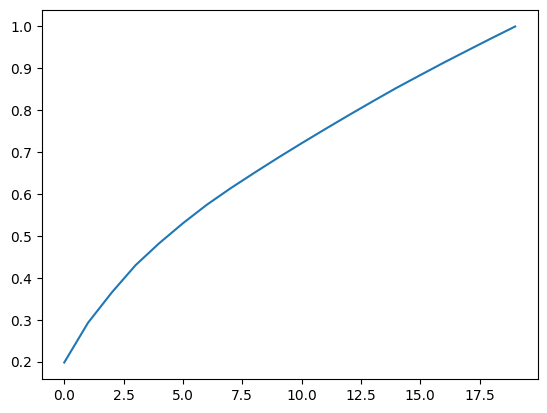

In [87]:
cumsum = np.cumsum(pca.explained_variance_ratio)

threshold = 0.95

plt.plot(cumsum)
# plt.axhline(y=threshold, color="r", linestyle="--")

### Algorithm to Apply

- Ridge
- Lasso
- ElasticNET

In [115]:
class Ridge():

    def __init__(self, learning_rate, epochs, alpha):

        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.alpha = alpha
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01

        for i in range(self.epochs):

            coef_slope = np.dot(X_train.T, X_train).dot(self.coef_) - np.dot(X_train.T, y_train) + np.dot(self.alpha, self.coef_)

            self.coef_ = self.coef_ - (self.lr * coef_slope)

        print(f"Coef_: {self.coef_}")
    
    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)

        y_pred = np.dot(X_test, self.coef_)

        return y_pred

In [120]:
ridge = Ridge(learning_rate=0.00001, epochs=1000, alpha=0.01)

In [121]:
ridge.fit(X_train, y_train)

Coef_: [ 1.78581446e+05  1.52746019e+04 -1.91509696e+03 -1.14472667e+04
 -1.27387560e+03 -1.32493410e+03 -6.90359027e+03  5.60160430e+03
 -3.87475860e+03 -7.85343260e+02 -1.94941823e+03 -4.93522553e+02
 -3.73112271e+02  1.08688991e+03  1.87532323e+03  2.63606360e+01
 -1.31979175e+03  4.11254075e+02  3.79032591e+02 -1.02474627e+03
  2.38987514e+02]


In [122]:
y_pred_ridge = ridge.predict(X_test)

In [123]:
from sklearn.metrics import r2_score

r2_score_ridge = r2_score(y_test, y_pred_ridge)

r2_score_ridge

0.8272323886861933

In [124]:
class Lasso():

    def __init__(self, learning_rate, epochs, alpha):

        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.alpha = alpha
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01

        for i in range(self.epochs):

            coef_slope = np.dot(X_train.T, X_train).dot(self.coef_) - np.dot(y_train.T, X_train) + np.dot(self.alpha, (np.sign(self.coef_)))

            self.coef_ = self.coef_ - (self.lr * coef_slope)
        
        print(f"Coef_: {self.coef_}")
    
    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)

        y_pred = np.dot(X_test, self.coef_)

        return y_pred

In [125]:
lasso = Lasso(learning_rate=0.00001, epochs=1000, alpha=0.01)

In [126]:
lasso.fit(X_train, y_train)

Coef_: [ 1.78582208e+05  1.52746060e+04 -1.91509804e+03 -1.14472752e+04
 -1.27387665e+03 -1.32493545e+03 -6.90359804e+03  5.60161116e+03
 -3.87476389e+03 -7.85344401e+02 -1.94942114e+03 -4.93523313e+02
 -3.73112859e+02  1.08689165e+03  1.87532630e+03  2.63606785e+01
 -1.31979408e+03  4.11254808e+02  3.79033291e+02 -1.02474818e+03
  2.38987968e+02]


In [127]:
y_pred_lasso = lasso.predict(X_test)

In [129]:
r2_score_lasso = r2_score(y_test, y_pred_lasso)
r2_score_lasso

0.8272334611940682

In [173]:
class Elastic():

    def __init__(self, learning_rate, epochs, alpha, l1_ratio):

        self.coef_ =  None
        self.lr = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.affect = l1_ratio
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01

        for i in range(self.epochs):

            y_hat = np.dot(X_train, self.coef_)

            coef_slope = np.dot(X_train.T, X_train).dot(self.coef_) - np.dot(y_train.T, X_train) + np.dot(self.alpha, (np.dot(self.affect, np.sign(self.coef_) + np.dot((1 - self.alpha), self.coef_))))

            self.coef_ = self.coef_ - (self.lr * coef_slope)
        
        print(f"Coef_: {self.coef_}")
        
    def predict(self, X_test):
        
        X_test = np.insert(X_test, 0, 1, axis=1)

        y_pred = np.dot(X_test, self.coef_)
        return y_pred


In [174]:
elastic = Elastic(learning_rate=0.00001, epochs=5000, alpha=0.01, l1_ratio=0.5)

In [175]:
elastic.fit(X_train, y_train)

Coef_: [ 1.78581831e+05  1.52746040e+04 -1.91509750e+03 -1.14472710e+04
 -1.27387613e+03 -1.32493478e+03 -6.90359420e+03  5.60160776e+03
 -3.87476127e+03 -7.85343836e+02 -1.94941970e+03 -4.93522937e+02
 -3.73112568e+02  1.08689079e+03  1.87532478e+03  2.63606575e+01
 -1.31979292e+03  4.11254445e+02  3.79032944e+02 -1.02474724e+03
  2.38987743e+02]


In [176]:
y_pred_elastic = elastic.predict(X_test)

In [177]:
r2_score_elastic = r2_score(y_test, y_pred_elastic)

r2_score_elastic


0.8272329303318195

In [178]:
print(f"Ridge Score: {r2_score_ridge}")
print(f"Lasso Score: {r2_score_lasso}")
print(f"Elastic Score: {r2_score_elastic}")

Ridge Score: 0.8272334611940682
Lasso Score: 0.8272334611940682
Elastic Score: 0.8272329303318195
